In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import pickle


In [3]:
df = pd.read_csv("../data/Instagram_fake_profile_dataset.csv")
df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [4]:
df.shape


(5000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           5000 non-null   int64  
 1   nums/length username  5000 non-null   float64
 2   fullname words        5000 non-null   int64  
 3   nums/length fullname  5000 non-null   float64
 4   name==username        5000 non-null   int64  
 5   description length    5000 non-null   int64  
 6   external URL          5000 non-null   int64  
 7   private               5000 non-null   int64  
 8   #posts                5000 non-null   int64  
 9   #followers            5000 non-null   int64  
 10  #follows              5000 non-null   int64  
 11  fake                  5000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 468.9 KB


In [6]:
df.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.00000
mean,0.598200,0.166175,1.212800,0.036068,0.007600,20.997200,0.049600,0.227800,103.331400,5.124435e+04,481.381800,0.50000
std,0.490311,0.194733,0.890435,0.106235,0.086855,33.234706,0.217139,0.419455,377.804886,5.963749e+05,761.530132,0.50005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,58.000000,0.00000
50%,1.000000,0.089193,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,1.450000e+02,242.000000,0.50000
75%,1.000000,0.300410,2.000000,0.000000,0.000000,31.250000,0.000000,0.000000,81.000000,6.960000e+02,591.000000,1.00000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.00000


In [7]:
df.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [8]:
df.columns = [
    'profile_pic',
    'nums_username_ratio',
    'fullname_words',
    'nums_fullname_ratio',
    'name_equals_username',
    'bio_length',
    'external_url',
    'is_private',
    'posts',
    'followers',
    'following',
    'label'
]

In [9]:
df.head()

,profile_pic,nums_username_ratio,fullname_words,nums_fullname_ratio,name_equals_username,bio_length,external_url,is_private,posts,followers,following,label
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [10]:
df['label'].value_counts()


label
0    2500
1    2500
Name: count, dtype: int64

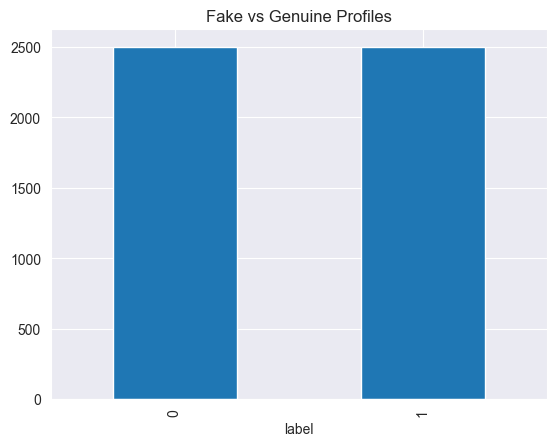

In [11]:
df['label'].value_counts().plot(kind='bar')
plt.title("Fake vs Genuine Profiles")
plt.show()


In [12]:
df.groupby('label')[['followers','posts','following']].mean()


,followers,posts,following
label,,,
0,102392.518,199.8364,668.4072
1,96.186,6.8264,294.3564


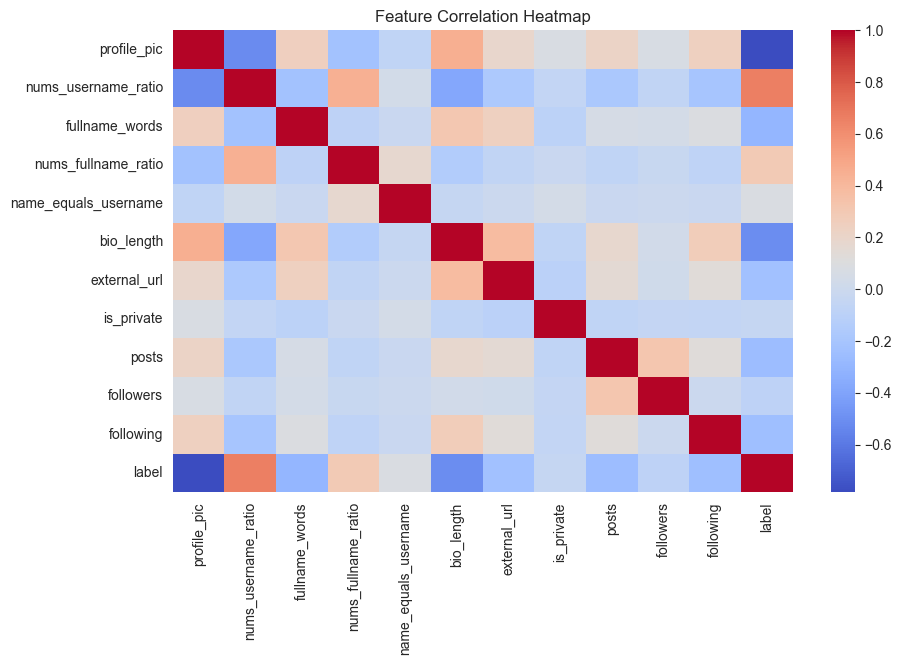

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


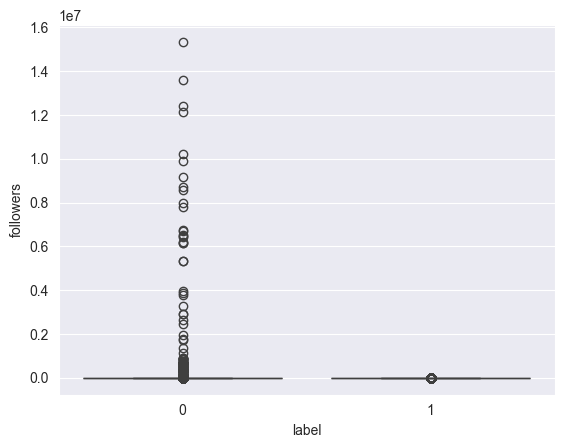

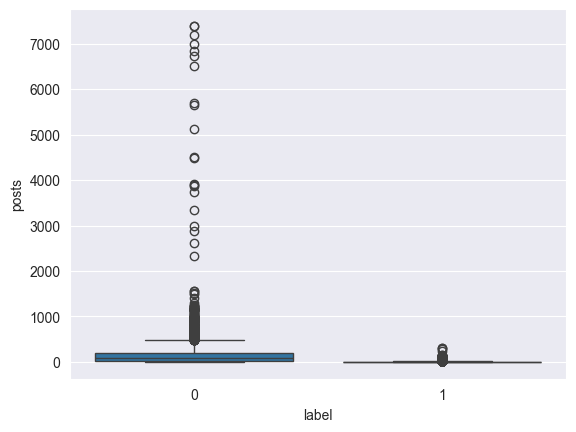

In [14]:
sns.boxplot(x='label', y='followers', data=df)
plt.show()

sns.boxplot(x='label', y='posts', data=df)
plt.show()


In [15]:
X = df.drop('label', axis=1)
y = df['label']


In [16]:
X.head(5)

,profile_pic,nums_username_ratio,fullname_words,nums_fullname_ratio,name_equals_username,bio_length,external_url,is_private,posts,followers,following
0,1,0.27,0,0.0,0,53,0,0,32,1000,955
1,1,0.00,2,0.0,0,44,0,0,286,2740,533
2,1,0.10,2,0.0,0,0,0,1,13,159,98
3,1,0.00,1,0.0,0,82,0,0,679,414,651
4,1,0.00,2,0.0,0,0,0,1,6,151,126


In [17]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
pickle.dump(scaler, open("../model/scaler.pkl", "wb"))


In [23]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       498
           1       0.96      0.94      0.95       502

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [24]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       498
           1       1.00      0.97      0.98       502

    accuracy                           0.98      1000
   macro avg       0.99      0.99      0.98      1000
weighted avg       0.99      0.98      0.98      1000



In [37]:
new_features = [1,0.0,0,0.0,0,86,0,1,54,259,1371]

# convert to array
new_features_array = np.array(new_features).reshape(1, -1)

# SCALE the input
new_features_scaled = scaler.transform(new_features_array)

# predict
predicted_profile = rf.predict(new_features_scaled)

print("Predicted profile:", predicted_profile)

if predicted_profile[0] == 0:
    print("The profile is genuine")
else:
    print("The profile is fake")


Predicted profile: [0]
The profile is genuine


C:\Users\suchi\PROJECTS\New folder\DUHacks5.0-Fake-Profile-Detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


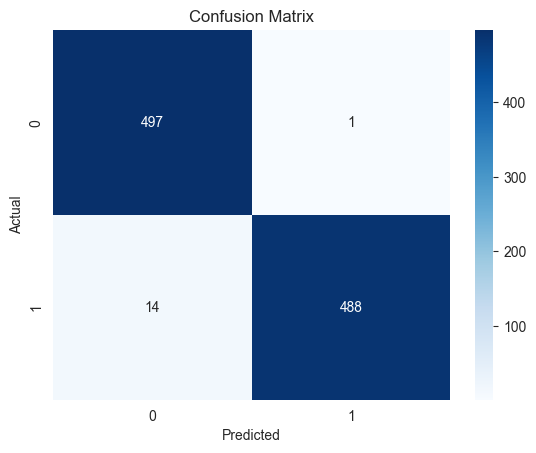

In [25]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [26]:
pickle.dump(rf, open("../model/trained_model.pkl", "wb"))